In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from torch import nn
import torch

ln1 = nn.Linear(1, 1, bias=False)

In [16]:
batch = torch.ones(10, 1)

In [17]:
ln1(batch)

tensor([[-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597],
        [-0.3597]], grad_fn=<MmBackward>)

In [18]:
from sklearn import datasets

In [19]:
X, y = datasets.make_blobs()

In [20]:
X.shape, y.shape

((100, 2), (100,))

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

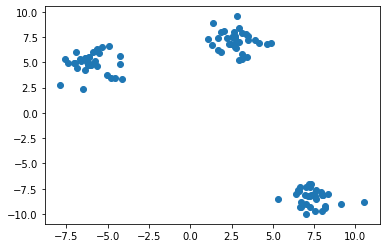

In [22]:
plt.scatter(X[:,0], X[:,1])

In [66]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_mu = nn.Linear(2, 2)
        self.encoder_logstd = nn.Linear(2, 2)
    
    def reparameterize(self, mu, log_var):
        if self.training:
            std = torch.exp(0.5 * log_var)
            eps = std.data.new(std.size()).normal_()
            return eps.mul(std).add_(mu)
        else:
            return mu
    
    def forward(self, inp):
        mu = self.encoder_mu(inp)
        logstd = self.encoder_logstd(inp)
        kl_loss = 0.5 * torch.sum(logstd.exp() - logstd - 1 + mu.pow(2))
        z = self.reparameterize(mu, logstd)
        return z, kl_loss

In [77]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.nn = nn.Linear(2, 2)
        self.loss_f = nn.MSELoss()
    
    def forward(self, inp, target=None):
        result = self.nn(inp)
        loss = self.loss_f(result, target)
        return loss.sum(), {}, {}
    
    def decode(self, inp):
        return self.nn(inp)

In [125]:
encoder = Encoder()
decoder = Decoder()

In [126]:
encoder(torch.ones(2))

(tensor([-0.7528, -0.3433], grad_fn=<AddBackward0>),
 tensor(0.9644, grad_fn=<MulBackward0>))

In [80]:
from models.Vae import Vae

In [81]:
import numpy as np

In [123]:
params = {
    'LEAF_EMBEDDING_DIM': 100,
    'EMBEDDING_DIM': 200,
    'HIDDEN_SIZE': 800,
    'LATENT_DIM': 800,
    'LEARNING_RATE': 1e-2,
    'EPOCHS': 30,
    'BATCH_SIZE': 1,
    'NUM_WORKERS': 8,
    'CLIP': 5,
    'KL_LOSS_WEIGHT': 0.001,
    'WEIGHTED_LOSS': False,         # Whether to weight the loss: with imbalanced vocabularies to how often the tokens occur
    'INDIV_LAYERS_VOCABS': False,   # Whether to use individual LSTM layers for each of the different vocabularies
    'TEACHER_FORCING_RATIO': 0.5,   # TODO: implement teacher forcing ratio -> does it make sense, e.g. predicted func decl but should be var decl then how does it work with children?
    'NAME_ID_VOCAB_SIZE': 120,      # vocabulary size for name tokens which are mapped to non-unique IDs should be high enough to cover all programs
    'RES_VOCAB_SIZE': np.random.randint(100),
    'NAME_WEIGHTS': None,
    'RES_WEIGHTS': np.random.randint(100)
}

In [127]:
vae = Vae(torch.device('cpu'), params, encoder, decoder)

In [128]:
vae.train(200, X)

1batch [00:00,  3.91batch/s, train_loss=6.25, val_loss=None, kl_loss=16.9, recon_loss=6.25, kl weight=0]
0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 10866.090895652771}



0batch [00:00, ?batch/s, train_loss=0.405, val_loss=None, kl_loss=29.4, recon_loss=0.258, kl weight=0.00503]
1batch [00:00,  4.20batch/s, train_loss=0.405, val_loss=None, kl_loss=29.4, recon_loss=0.258, kl weight=0.00503]

0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 4394.894323348999}




0batch [00:00, ?batch/s, train_loss=0.364, val_loss=None, kl_loss=28.2, recon_loss=0.0808, kl weight=0.0101]

1batch [00:00,  4.03batch/s, train_loss=0.364, val_loss=None, kl_loss=28.2, recon_loss=0.0808, kl weight=0.0101]


0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 4371.200366973877}





0batch [00:00, ?batch/s, train_loss=0.403, val_loss=None, kl_loss=26.4, recon_loss=0.00582, kl weight=0.0151]


1batch [00:00,  3.88batch/s, train_loss=0.403, val_loss=None, kl_loss=26.4, recon_loss=0.00582, kl weight=0.0151]




0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 4005.5682039260864}







0batch [00:00, ?batch/s, train_loss=0.615, val_loss=None, kl_loss=22, recon_loss=0.173, kl weight=0.0201]




1batch [00:00,  3.93batch/s, train_loss=0.615, val_loss=None, kl_loss=22, recon_loss=0.173, kl weight=0.0201]





0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 3402.5519876480103}








0batch [00:00, ?batch/s, train_loss=0.692, val_loss=None, kl_loss=19.8, recon_loss=0.196, kl weight=0.0251]





1batch [00:00,  3.49batch/s, train_loss=0.692, val_loss=None, kl_loss=19.8, recon_loss=0.196, kl weight=0.0251]






0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 2937.6526412963867}









0batch [00:00, ?batch/s, train_loss=0.7, val_loss=None, kl_loss=15.8, recon_loss=0.224, kl weight=0.0302]






1batch [00:00,  3.86batch/s, train_loss=0.7, val_loss=None, kl_loss=15.8, recon_loss=0.224, kl weight=0.0302]







0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 2468.4671030044556}










0batch [00:00, ?batch/s, train_loss=0.507, val_loss=None, kl_loss=14.2, recon_loss=0.00661, kl weight=0.0352]







1batch [00:00,  3.85batch/s, train_loss=0.507, val_loss=None, kl_loss=14.2, recon_loss=0.00661, kl weight=0.0352]








0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 2102.058320045471}











0batch [00:00, ?batch/s, train_loss=0.791, val_loss=None, kl_loss=11.7, recon_loss=0.32, kl weight=0.0402]








1batch [00:00,  3.70batch/s, train_loss=0.791, val_loss=None, kl_loss=11.7, recon_loss=0.32, kl weight=0.0402]









1batch [00:02,  2.37s/batch, train_loss=6.25, val_loss=None, kl_loss=16.9, recon_loss=6.25, kl weight=0]
1batch [00:02,  2.12s/batch, train_loss=0.405, val_loss=None, kl_loss=29.4, recon_loss=0.258, kl weight=0.00503]
1batch [00:01,  1.87s/batch, train_loss=0.364, val_loss=None, kl_loss=28.2, recon_loss=0.0808, kl weight=0.0101]
1batch [00:01,  1.62s/batch, train_loss=0.403, val_loss=None, kl_loss=26.4, recon_loss=0.00582, kl weight=0.0151]
1batch [00:01,  1.36s/batch, train_loss=0.615, val_loss=None, kl_loss=22, recon_loss=0.173, kl weight=0.0201]
1batch [00:01,  1.10s/batch, train_loss=0.692, val_loss=None, kl_loss=19.8, recon_loss=0.196, kl weight=0.0251]
1batch [00:00,  1.23batch/s, train_loss=0.7, val_loss=None, kl_loss=15.8, recon_loss=0.22

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1773.986632347107}












0batch [00:00, ?batch/s, train_loss=0.725, val_loss=None, kl_loss=10.8, recon_loss=0.235, kl weight=0.0452]









0batch [00:00, ?batch/s]h/s, train_loss=0.725, val_loss=None, kl_loss=10.8, recon_loss=0.235, kl weight=0.0452]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1556.9809956550598}


1batch [00:00,  3.57batch/s, train_loss=0.654, val_loss=None, kl_loss=9.54, recon_loss=0.174, kl weight=0.0503]
0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1421.610984802246}



0batch [00:00, ?batch/s, train_loss=0.495, val_loss=None, kl_loss=8.6, recon_loss=0.0193, kl weight=0.0553]
1batch [00:00,  3.23batch/s, train_loss=0.495, val_loss=None, kl_loss=8.6, recon_loss=0.0193, kl weight=0.0553]

0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1282.058678150177}




0batch [00:00, ?batch/s, train_loss=0.525, val_loss=None, kl_loss=7.78, recon_loss=0.0559, kl weight=0.0603]

1batch [00:00,  3.41batch/s, train_loss=0.525, val_loss=None, kl_loss=7.78, recon_loss=0.0559, kl weight=0.0603]


0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1216.9636611938477}





0batch [00:00, ?batch/s, train_loss=1, val_loss=None, kl_loss=7.33, recon_loss=0.521, kl weight=0.0653]


1batch [00:00,  3.47batch/s, train_loss=1, val_loss=None, kl_loss=7.33, recon_loss=0.521, kl weight=0.0653]




0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1148.324963569641}







0batch [00:00, ?batch/s, train_loss=1.18, val_loss=None, kl_loss=6.63, recon_loss=0.717, kl weight=0.0704]




1batch [00:00,  3.56batch/s, train_loss=1.18, val_loss=None, kl_loss=6.63, recon_loss=0.717, kl weight=0.0704]





0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1062.2581539154053}








0batch [00:00, ?batch/s, train_loss=0.672, val_loss=None, kl_loss=6.81, recon_loss=0.159, kl weight=0.0754]





1batch [00:00,  3.74batch/s, train_loss=0.672, val_loss=None, kl_loss=6.81, recon_loss=0.159, kl weight=0.0754]






0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 1011.1964402198792}









0batch [00:00, ?batch/s, train_loss=0.629, val_loss=None, kl_loss=6.6, recon_loss=0.0992, kl weight=0.0804]






1batch [00:00,  3.12batch/s, train_loss=0.629, val_loss=None, kl_loss=6.6, recon_loss=0.0992, kl weight=0.0804]







0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 982.6639041900635}










0batch [00:00, ?batch/s, train_loss=0.57, val_loss=None, kl_loss=5.7, recon_loss=0.0834, kl weight=0.0854]







1batch [00:00,  3.05batch/s, train_loss=0.57, val_loss=None, kl_loss=5.7, recon_loss=0.0834, kl weight=0.0854]










0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 901.1871485710144}













0batch [00:00, ?batch/s, train_loss=0.739, val_loss=None, kl_loss=5.69, recon_loss=0.224, kl weight=0.0905]










1batch [00:00,  3.04batch/s, train_loss=0.739, val_loss=None, kl_loss=5.69, recon_loss=0.224, kl weight=0.0905]











0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 837.4449067115784}














0batch [00:00, ?batch/s, train_loss=1.1, val_loss=None, kl_loss=5.83, recon_loss=0.547, kl weight=0.0955]











1batch [00:00,  3.13batch/s, train_loss=1.1, val_loss=None, kl_loss=5.83, recon_loss=0.547, kl weight=0.0955]












0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 817.1358394622803}















0batch [00:00, ?batch/s, train_loss=1.06, val_loss=None, kl_loss=5.06, recon_loss=0.547, kl weight=0.101]












1batch [00:00,  3.24batch/s, train_loss=1.06, val_loss=None, kl_loss=5.06, recon_loss=0.547, kl weight=0.101]













0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 788.5384287834167}
















0batch [00:00, ?batch/s, train_loss=0.591, val_loss=None, kl_loss=5.01, recon_loss=0.0618, kl weight=0.106]













1batch [00:00,  2.60batch/s, train_loss=0.591, val_loss=None, kl_loss=5.01, recon_loss=0.0618, kl weight=0.106]














0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 762.323046207428}

















0batch [00:00, ?batch/s, train_loss=0.803, val_loss=None, kl_loss=4.84, recon_loss=0.268, kl weight=0.111]














1batch [00:00,  3.02batch/s, train_loss=0.803, val_loss=None, kl_loss=4.84, recon_loss=0.268, kl weight=0.111]















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 751.0359263420105}


















0batch [00:00, ?batch/s, train_loss=1.06, val_loss=None, kl_loss=4.91, recon_loss=0.497, kl weight=0.116]















1batch [00:00,  3.31batch/s, train_loss=1.06, val_loss=None, kl_loss=4.91, recon_loss=0.497, kl weight=0.116]
















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 723.1448082923889}



















0batch [00:00, ?batch/s, train_loss=0.913, val_loss=None, kl_loss=4.94, recon_loss=0.317, kl weight=0.121]
















1batch [00:00,  3.09batch/s, train_loss=0.913, val_loss=None, kl_loss=4.94, recon_loss=0.317, kl weight=0.121]

















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 703.9228296279907}




















0batch [00:00, ?batch/s, train_loss=0.65, val_loss=None, kl_loss=5.07, recon_loss=0.0134, kl weight=0.126]

















1batch [00:00,  2.61batch/s, train_loss=0.65, val_loss=None, kl_loss=5.07, recon_loss=0.0134, kl weight=0.126]


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 689.2292523384094}





















 ... (more hidden) ...


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 660.4056234359741}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 671.4764528274536}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 627.0239086151123}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 617.0118527412415}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 596.4373943805695}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 603.6174819469452}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 581.5799148082733}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 576.4180064201355}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 566.9257669448853}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 561.3927826881409}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 552.4515929222107}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 543.3096218109131}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 542.5559673309326}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SI

1batch [00:12, 12.07s/batch, train_loss=0.654, val_loss=None, kl_loss=9.54, recon_loss=0.174, kl weight=0.0503]
1batch [00:11, 11.79s/batch, train_loss=0.495, val_loss=None, kl_loss=8.6, recon_loss=0.0193, kl weight=0.0553]
1batch [00:11, 11.47s/batch, train_loss=0.525, val_loss=None, kl_loss=7.78, recon_loss=0.0559, kl weight=0.0603]
1batch [00:11, 11.17s/batch, train_loss=1, val_loss=None, kl_loss=7.33, recon_loss=0.521, kl weight=0.0653]
1batch [00:10, 10.88s/batch, train_loss=1.18, val_loss=None, kl_loss=6.63, recon_loss=0.717, kl weight=0.0704]
1batch [00:10, 10.59s/batch, train_loss=0.672, val_loss=None, kl_loss=6.81, recon_loss=0.159, kl weight=0.0754]
1batch [00:10, 10.32s/batch, train_loss=0.629, val_loss=None, kl_loss=6.6, recon_loss=0.0992, kl weight=0.0804]
1batch [00:09,  9.99s/batch, train_loss=0.57, val_loss=None, kl_loss=5.7, recon_loss=0.0834, kl weight=0.0854]
1batch [00:09,  9.66s/batch, train_loss=0.739, val_loss=None, kl_loss=5.69, recon_loss=0.224, kl weight=0.090

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 491.32099413871765}



0batch [00:00, ?batch/s, train_loss=1.3, val_loss=None, kl_loss=3.45, recon_loss=0.381, kl weight=0.266]
1batch [00:00,  3.86batch/s, train_loss=1.3, val_loss=None, kl_loss=3.45, recon_loss=0.381, kl weight=0.266]

0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 496.87845611572266}




0batch [00:00, ?batch/s, train_loss=1.72, val_loss=None, kl_loss=2.88, recon_loss=0.936, kl weight=0.271]

1batch [00:00,  3.90batch/s, train_loss=1.72, val_loss=None, kl_loss=2.88, recon_loss=0.936, kl weight=0.271]


0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 497.6439833641052}





0batch [00:00, ?batch/s, train_loss=1.03, val_loss=None, kl_loss=3.27, recon_loss=0.128, kl weight=0.276]


1batch [00:00,  3.92batch/s, train_loss=1.03, val_loss=None, kl_loss=3.27, recon_loss=0.128, kl weight=0.276]




0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 486.2278416156769}







0batch [00:00, ?batch/s, train_loss=0.941, val_loss=None, kl_loss=3.17, recon_loss=0.0496, kl weight=0.281]




1batch [00:00,  4.02batch/s, train_loss=0.941, val_loss=None, kl_loss=3.17, recon_loss=0.0496, kl weight=0.281]





0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 466.6040372848511}








0batch [00:00, ?batch/s, train_loss=4.54, val_loss=None, kl_loss=3.1, recon_loss=3.65, kl weight=0.286]





1batch [00:00,  3.91batch/s, train_loss=4.54, val_loss=None, kl_loss=3.1, recon_loss=3.65, kl weight=0.286]






0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 458.68511724472046}









0batch [00:00, ?batch/s, train_loss=2.66, val_loss=None, kl_loss=3.29, recon_loss=1.7, kl weight=0.291]






1batch [00:00,  3.96batch/s, train_loss=2.66, val_loss=None, kl_loss=3.29, recon_loss=1.7, kl weight=0.291]







0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 457.65856742858887}










0batch [00:00, ?batch/s, train_loss=1.22, val_loss=None, kl_loss=3.12, recon_loss=0.297, kl weight=0.296]







1batch [00:00,  3.72batch/s, train_loss=1.22, val_loss=None, kl_loss=3.12, recon_loss=0.297, kl weight=0.296]










0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 470.2398624420166}













0batch [00:00, ?batch/s, train_loss=4.27, val_loss=None, kl_loss=2.77, recon_loss=3.44, kl weight=0.302]










1batch [00:00,  3.71batch/s, train_loss=4.27, val_loss=None, kl_loss=2.77, recon_loss=3.44, kl weight=0.302]











0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 437.92789006233215}














0batch [00:00, ?batch/s, train_loss=0.96, val_loss=None, kl_loss=3.1, recon_loss=0.00846, kl weight=0.307]











1batch [00:00,  3.64batch/s, train_loss=0.96, val_loss=None, kl_loss=3.1, recon_loss=0.00846, kl weight=0.307]












0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 451.254599571228}















0batch [00:00, ?batch/s, train_loss=2.51, val_loss=None, kl_loss=2.76, recon_loss=1.65, kl weight=0.312]












1batch [00:00,  3.72batch/s, train_loss=2.51, val_loss=None, kl_loss=2.76, recon_loss=1.65, kl weight=0.312]













0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 436.43423986434937}
















0batch [00:00, ?batch/s, train_loss=2.57, val_loss=None, kl_loss=3.15, recon_loss=1.57, kl weight=0.317]













1batch [00:00,  3.51batch/s, train_loss=2.57, val_loss=None, kl_loss=3.15, recon_loss=1.57, kl weight=0.317]














0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 438.16015005111694}

















0batch [00:00, ?batch/s, train_loss=2.52, val_loss=None, kl_loss=3.17, recon_loss=1.5, kl weight=0.322]














1batch [00:00,  3.56batch/s, train_loss=2.52, val_loss=None, kl_loss=3.17, recon_loss=1.5, kl weight=0.322]















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 456.4595844745636}


















0batch [00:00, ?batch/s, train_loss=2.48, val_loss=None, kl_loss=3.34, recon_loss=1.39, kl weight=0.327]















1batch [00:00,  3.37batch/s, train_loss=2.48, val_loss=None, kl_loss=3.34, recon_loss=1.39, kl weight=0.327]
















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 440.175496339798}



















0batch [00:00, ?batch/s, train_loss=1.13, val_loss=None, kl_loss=3.41, recon_loss=0.00404, kl weight=0.332]
















1batch [00:00,  3.24batch/s, train_loss=1.13, val_loss=None, kl_loss=3.41, recon_loss=0.00404, kl weight=0.332]

















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 451.4778051376343}




















0batch [00:00, ?batch/s, train_loss=1.88, val_loss=None, kl_loss=3.48, recon_loss=0.707, kl weight=0.337]

















1batch [00:00,  3.40batch/s, train_loss=1.88, val_loss=None, kl_loss=3.48, recon_loss=0.707, kl weight=0.337]


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 446.90172815322876}





















 ... (more hidden) ...


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 445.7017753124237}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 460.9615514278412}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 450.92136883735657}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 446.0710370540619}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 447.4575581550598}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 444.05279755592346}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 437.6704623699188}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 437.19693422317505}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 442.30911922454834}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 443.5346622467041}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 450.718448638916}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 425.42767882347107}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 410.9826707839966}
{'NAME': 0, 'RES': 0, 'PARENT': 0,

1batch [00:12, 12.09s/batch, train_loss=1.72, val_loss=None, kl_loss=2.88, recon_loss=0.936, kl weight=0.271]
1batch [00:11, 11.83s/batch, train_loss=1.03, val_loss=None, kl_loss=3.27, recon_loss=0.128, kl weight=0.276]
1batch [00:11, 11.57s/batch, train_loss=0.941, val_loss=None, kl_loss=3.17, recon_loss=0.0496, kl weight=0.281]
1batch [00:11, 11.32s/batch, train_loss=4.54, val_loss=None, kl_loss=3.1, recon_loss=3.65, kl weight=0.286]
1batch [00:11, 11.06s/batch, train_loss=2.66, val_loss=None, kl_loss=3.29, recon_loss=1.7, kl weight=0.291]
1batch [00:10, 10.81s/batch, train_loss=1.22, val_loss=None, kl_loss=3.12, recon_loss=0.297, kl weight=0.296]
1batch [00:10, 10.53s/batch, train_loss=4.27, val_loss=None, kl_loss=2.77, recon_loss=3.44, kl weight=0.302]
1batch [00:10, 10.26s/batch, train_loss=0.96, val_loss=None, kl_loss=3.1, recon_loss=0.00846, kl weight=0.307]
1batch [00:09,  9.98s/batch, train_loss=2.51, val_loss=None, kl_loss=2.76, recon_loss=1.65, kl weight=0.312]
1batch [00:09

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 411.9709515571594}





0batch [00:00, ?batch/s, train_loss=1.56, val_loss=None, kl_loss=3.02, recon_loss=0.0872, kl weight=0.487]


1batch [00:00,  2.93batch/s, train_loss=1.56, val_loss=None, kl_loss=3.02, recon_loss=0.0872, kl weight=0.487]




0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 418.6112480163574}







0batch [00:00, ?batch/s, train_loss=4.36, val_loss=None, kl_loss=2.67, recon_loss=3.04, kl weight=0.492]




1batch [00:00,  3.52batch/s, train_loss=4.36, val_loss=None, kl_loss=2.67, recon_loss=3.04, kl weight=0.492]





0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 410.2915451526642}








0batch [00:00, ?batch/s, train_loss=2.21, val_loss=None, kl_loss=2.42, recon_loss=1, kl weight=0.497]





1batch [00:00,  3.49batch/s, train_loss=2.21, val_loss=None, kl_loss=2.42, recon_loss=1, kl weight=0.497]






0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 402.75939416885376}









0batch [00:00, ?batch/s, train_loss=4.15, val_loss=None, kl_loss=2.7, recon_loss=2.79, kl weight=0.503]






1batch [00:00,  3.30batch/s, train_loss=4.15, val_loss=None, kl_loss=2.7, recon_loss=2.79, kl weight=0.503]







0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 406.4669396877289}










0batch [00:00, ?batch/s, train_loss=2.32, val_loss=None, kl_loss=2.34, recon_loss=1.13, kl weight=0.508]







1batch [00:00,  3.10batch/s, train_loss=2.32, val_loss=None, kl_loss=2.34, recon_loss=1.13, kl weight=0.508]










0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 387.9913878440857}













0batch [00:00, ?batch/s, train_loss=4.63, val_loss=None, kl_loss=2.59, recon_loss=3.3, kl weight=0.513]










1batch [00:00,  3.15batch/s, train_loss=4.63, val_loss=None, kl_loss=2.59, recon_loss=3.3, kl weight=0.513]











0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 386.4304196834564}














0batch [00:00, ?batch/s, train_loss=1.53, val_loss=None, kl_loss=2.46, recon_loss=0.252, kl weight=0.518]











1batch [00:00,  3.06batch/s, train_loss=1.53, val_loss=None, kl_loss=2.46, recon_loss=0.252, kl weight=0.518]












0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 391.6802155971527}















0batch [00:00, ?batch/s, train_loss=2.27, val_loss=None, kl_loss=2.66, recon_loss=0.88, kl weight=0.523]












1batch [00:00,  3.13batch/s, train_loss=2.27, val_loss=None, kl_loss=2.66, recon_loss=0.88, kl weight=0.523]













0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 381.3503293991089}
















0batch [00:00, ?batch/s, train_loss=1.47, val_loss=None, kl_loss=2.22, recon_loss=0.3, kl weight=0.528]













1batch [00:00,  3.48batch/s, train_loss=1.47, val_loss=None, kl_loss=2.22, recon_loss=0.3, kl weight=0.528]














0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 379.6466529369354}

















0batch [00:00, ?batch/s, train_loss=2.1, val_loss=None, kl_loss=2.7, recon_loss=0.659, kl weight=0.533]














1batch [00:00,  3.53batch/s, train_loss=2.1, val_loss=None, kl_loss=2.7, recon_loss=0.659, kl weight=0.533]















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 395.5538241863251}


















0batch [00:00, ?batch/s, train_loss=3.85, val_loss=None, kl_loss=2.75, recon_loss=2.37, kl weight=0.538]















1batch [00:00,  3.62batch/s, train_loss=3.85, val_loss=None, kl_loss=2.75, recon_loss=2.37, kl weight=0.538]
















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 396.7086145877838}



















0batch [00:00, ?batch/s, train_loss=1.61, val_loss=None, kl_loss=2.81, recon_loss=0.0869, kl weight=0.543]
















1batch [00:00,  3.15batch/s, train_loss=1.61, val_loss=None, kl_loss=2.81, recon_loss=0.0869, kl weight=0.543]

















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 390.1842646598816}




















0batch [00:00, ?batch/s, train_loss=1.95, val_loss=None, kl_loss=2.85, recon_loss=0.394, kl weight=0.548]

















1batch [00:00,  2.80batch/s, train_loss=1.95, val_loss=None, kl_loss=2.85, recon_loss=0.394, kl weight=0.548]


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 387.15379571914673}





















 ... (more hidden) ...


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 384.86594557762146}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 388.10045075416565}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 384.5595135688782}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 373.63708686828613}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 372.3478717803955}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 368.1296215057373}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 365.75325083732605}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 377.3985905647278}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 357.9996476173401}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 369.74193835258484}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 366.167982339859}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 362.2232048511505}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 353.14838337898254}
{'NAME': 0, 'RES': 0, 'PARENT': 0

1batch [00:12, 12.30s/batch, train_loss=4.36, val_loss=None, kl_loss=2.67, recon_loss=3.04, kl weight=0.492]
1batch [00:12, 12.01s/batch, train_loss=2.21, val_loss=None, kl_loss=2.42, recon_loss=1, kl weight=0.497]
1batch [00:11, 11.72s/batch, train_loss=4.15, val_loss=None, kl_loss=2.7, recon_loss=2.79, kl weight=0.503]
1batch [00:11, 11.40s/batch, train_loss=2.32, val_loss=None, kl_loss=2.34, recon_loss=1.13, kl weight=0.508]
1batch [00:11, 11.08s/batch, train_loss=4.63, val_loss=None, kl_loss=2.59, recon_loss=3.3, kl weight=0.513]
1batch [00:10, 10.75s/batch, train_loss=1.53, val_loss=None, kl_loss=2.46, recon_loss=0.252, kl weight=0.518]
1batch [00:10, 10.42s/batch, train_loss=2.27, val_loss=None, kl_loss=2.66, recon_loss=0.88, kl weight=0.523]
1batch [00:10, 10.09s/batch, train_loss=1.47, val_loss=None, kl_loss=2.22, recon_loss=0.3, kl weight=0.528]
1batch [00:09,  9.80s/batch, train_loss=2.1, val_loss=None, kl_loss=2.7, recon_loss=0.659, kl weight=0.533]
1batch [00:09,  9.52s/bat

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 367.93091559410095}








0batch [00:00, ?batch/s, train_loss=3, val_loss=None, kl_loss=2.56, recon_loss=1.19, kl weight=0.709]




1batch [00:00,  2.73batch/s, train_loss=3, val_loss=None, kl_loss=2.56, recon_loss=1.19, kl weight=0.709]





0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 367.90403175354004}








0batch [00:00, ?batch/s, train_loss=9.76, val_loss=None, kl_loss=2.65, recon_loss=7.87, kl weight=0.714]





1batch [00:00,  3.64batch/s, train_loss=9.76, val_loss=None, kl_loss=2.65, recon_loss=7.87, kl weight=0.714]






0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 367.5547842979431}









0batch [00:00, ?batch/s, train_loss=3.65, val_loss=None, kl_loss=2.1, recon_loss=2.15, kl weight=0.719]






1batch [00:00,  3.71batch/s, train_loss=3.65, val_loss=None, kl_loss=2.1, recon_loss=2.15, kl weight=0.719]







0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 364.2152440547943}










0batch [00:00, ?batch/s, train_loss=3.11, val_loss=None, kl_loss=2.54, recon_loss=1.27, kl weight=0.724]







1batch [00:00,  3.86batch/s, train_loss=3.11, val_loss=None, kl_loss=2.54, recon_loss=1.27, kl weight=0.724]










0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 361.590496301651}













0batch [00:00, ?batch/s, train_loss=3.52, val_loss=None, kl_loss=2.4, recon_loss=1.77, kl weight=0.729]










1batch [00:00,  3.45batch/s, train_loss=3.52, val_loss=None, kl_loss=2.4, recon_loss=1.77, kl weight=0.729]











0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 359.33439350128174}














0batch [00:00, ?batch/s, train_loss=3.37, val_loss=None, kl_loss=2.22, recon_loss=1.75, kl weight=0.734]











1batch [00:00,  3.52batch/s, train_loss=3.37, val_loss=None, kl_loss=2.22, recon_loss=1.75, kl weight=0.734]












0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 355.09351801872253}















0batch [00:00, ?batch/s, train_loss=3.54, val_loss=None, kl_loss=2.38, recon_loss=1.78, kl weight=0.739]












1batch [00:00,  3.48batch/s, train_loss=3.54, val_loss=None, kl_loss=2.38, recon_loss=1.78, kl weight=0.739]













0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 356.50158071517944}
















0batch [00:00, ?batch/s, train_loss=1.9, val_loss=None, kl_loss=1.94, recon_loss=0.461, kl weight=0.744]













1batch [00:00,  3.69batch/s, train_loss=1.9, val_loss=None, kl_loss=1.94, recon_loss=0.461, kl weight=0.744]














0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 352.7557969093323}

















0batch [00:00, ?batch/s, train_loss=2.84, val_loss=None, kl_loss=2.33, recon_loss=1.1, kl weight=0.749]














1batch [00:00,  3.71batch/s, train_loss=2.84, val_loss=None, kl_loss=2.33, recon_loss=1.1, kl weight=0.749]















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 367.61639618873596}


















0batch [00:00, ?batch/s, train_loss=2.19, val_loss=None, kl_loss=2.57, recon_loss=0.258, kl weight=0.754]















1batch [00:00,  2.95batch/s, train_loss=2.19, val_loss=None, kl_loss=2.57, recon_loss=0.258, kl weight=0.754]
















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 362.66478300094604}



















0batch [00:00, ?batch/s, train_loss=2.16, val_loss=None, kl_loss=1.98, recon_loss=0.662, kl weight=0.759]
















1batch [00:00,  3.28batch/s, train_loss=2.16, val_loss=None, kl_loss=1.98, recon_loss=0.662, kl weight=0.759]

















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 336.97217202186584}




















0batch [00:00, ?batch/s, train_loss=2.18, val_loss=None, kl_loss=2.26, recon_loss=0.45, kl weight=0.764]

















1batch [00:00,  3.43batch/s, train_loss=2.18, val_loss=None, kl_loss=2.26, recon_loss=0.45, kl weight=0.764]


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 339.4969804286957}





















 ... (more hidden) ...


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 329.4022408723831}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 339.6372002363205}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 341.02315402030945}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 341.48756897449493}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 351.94756531715393}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 325.1972143650055}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 347.9206962585449}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 345.1861300468445}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 342.20562744140625}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 347.06709361076355}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 335.9283912181854}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 349.76790475845337}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 341.97576808929443}
{'NAME': 0, 'RES': 0, 'PARENT':

1batch [00:11, 11.19s/batch, train_loss=9.76, val_loss=None, kl_loss=2.65, recon_loss=7.87, kl weight=0.714]
1batch [00:10, 10.91s/batch, train_loss=3.65, val_loss=None, kl_loss=2.1, recon_loss=2.15, kl weight=0.719]
1batch [00:10, 10.64s/batch, train_loss=3.11, val_loss=None, kl_loss=2.54, recon_loss=1.27, kl weight=0.724]
1batch [00:10, 10.38s/batch, train_loss=3.52, val_loss=None, kl_loss=2.4, recon_loss=1.77, kl weight=0.729]
1batch [00:10, 10.08s/batch, train_loss=3.37, val_loss=None, kl_loss=2.22, recon_loss=1.75, kl weight=0.734]
1batch [00:09,  9.79s/batch, train_loss=3.54, val_loss=None, kl_loss=2.38, recon_loss=1.78, kl weight=0.739]
1batch [00:09,  9.50s/batch, train_loss=1.9, val_loss=None, kl_loss=1.94, recon_loss=0.461, kl weight=0.744]
1batch [00:09,  9.23s/batch, train_loss=2.84, val_loss=None, kl_loss=2.33, recon_loss=1.1, kl weight=0.749]
1batch [00:08,  8.95s/batch, train_loss=2.19, val_loss=None, kl_loss=2.57, recon_loss=0.258, kl weight=0.754]
1batch [00:08,  8.61s

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 310.24753046035767}









0batch [00:00, ?batch/s, train_loss=5.35, val_loss=None, kl_loss=2.6, recon_loss=2.93, kl weight=0.93]





1batch [00:00,  3.38batch/s, train_loss=5.35, val_loss=None, kl_loss=2.6, recon_loss=2.93, kl weight=0.93]






0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 306.9724805355072}









0batch [00:00, ?batch/s, train_loss=4.47, val_loss=None, kl_loss=2.18, recon_loss=2.43, kl weight=0.935]






1batch [00:00,  3.96batch/s, train_loss=4.47, val_loss=None, kl_loss=2.18, recon_loss=2.43, kl weight=0.935]







0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 318.742196559906}










0batch [00:00, ?batch/s, train_loss=5.87, val_loss=None, kl_loss=2.42, recon_loss=3.59, kl weight=0.94]







1batch [00:00,  3.55batch/s, train_loss=5.87, val_loss=None, kl_loss=2.42, recon_loss=3.59, kl weight=0.94]










0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 304.0413554906845}













0batch [00:00, ?batch/s, train_loss=2.18, val_loss=None, kl_loss=2.12, recon_loss=0.182, kl weight=0.945]










1batch [00:00,  3.81batch/s, train_loss=2.18, val_loss=None, kl_loss=2.12, recon_loss=0.182, kl weight=0.945]











0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 314.8211851119995}














0batch [00:00, ?batch/s, train_loss=6.36, val_loss=None, kl_loss=2.34, recon_loss=4.15, kl weight=0.95]











1batch [00:00,  3.27batch/s, train_loss=6.36, val_loss=None, kl_loss=2.34, recon_loss=4.15, kl weight=0.95]












0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 311.82018411159515}















0batch [00:00, ?batch/s, train_loss=2.64, val_loss=None, kl_loss=1.76, recon_loss=0.959, kl weight=0.955]












1batch [00:00,  3.57batch/s, train_loss=2.64, val_loss=None, kl_loss=1.76, recon_loss=0.959, kl weight=0.955]













0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 310.75096368789673}
















0batch [00:00, ?batch/s, train_loss=4.25, val_loss=None, kl_loss=2.4, recon_loss=1.94, kl weight=0.96]













1batch [00:00,  3.37batch/s, train_loss=4.25, val_loss=None, kl_loss=2.4, recon_loss=1.94, kl weight=0.96]














0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 317.1526937484741}

















0batch [00:00, ?batch/s, train_loss=2.38, val_loss=None, kl_loss=2.21, recon_loss=0.252, kl weight=0.965]














1batch [00:00,  3.69batch/s, train_loss=2.38, val_loss=None, kl_loss=2.21, recon_loss=0.252, kl weight=0.965]















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 305.76663053035736}


















0batch [00:00, ?batch/s, train_loss=3.33, val_loss=None, kl_loss=2.27, recon_loss=1.13, kl weight=0.97]















1batch [00:00,  3.70batch/s, train_loss=3.33, val_loss=None, kl_loss=2.27, recon_loss=1.13, kl weight=0.97]
















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 294.35159039497375}



















0batch [00:00, ?batch/s, train_loss=21.6, val_loss=None, kl_loss=1.96, recon_loss=19.7, kl weight=0.975]
















1batch [00:00,  3.67batch/s, train_loss=21.6, val_loss=None, kl_loss=1.96, recon_loss=19.7, kl weight=0.975]

















0batch [00:00, ?batch/s]

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 314.6188142299652}




















0batch [00:00, ?batch/s, train_loss=6.86, val_loss=None, kl_loss=2.2, recon_loss=4.7, kl weight=0.98]

















1batch [00:00,  3.31batch/s, train_loss=6.86, val_loss=None, kl_loss=2.2, recon_loss=4.7, kl weight=0.98]


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 317.54044783115387}





















 ... (more hidden) ...


















 ... (more hidden) ...

{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 310.87072575092316}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 322.4767117500305}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 305.366601228714}
{'NAME': 0, 'RES': 0, 'PARENT': 0, 'SIBLING': 0, 'KL': 310.9204306602478}


{}

In [129]:
encoder.eval()
decoder.eval()
decoder(encoder(torch.tensor(X[:1], dtype=torch.float))[0], 
                target=torch.tensor(X[:1], dtype=torch.float))

(tensor(0.6778, grad_fn=<SumBackward0>), {}, {})

In [130]:
X[:1]

array([[-6.07987709,  4.84715135]])

In [131]:
decoder.decode(encoder(torch.tensor(X[:1], dtype=torch.float))[0])

tensor([[-5.4076,  3.8966]], grad_fn=<AddmmBackward>)

In [48]:
def t(a):
    return torch.tensor(a, dtype=torch.float)

In [49]:
t(X[:10])

tensor([[-6.0799,  4.8472],
        [ 8.0099, -9.7026],
        [ 3.4064,  7.7907],
        [ 3.1329,  5.3659],
        [-5.6674,  6.2844],
        [-6.3444,  5.4767],
        [ 3.4692,  7.6343],
        [ 4.1415,  6.8818],
        [-6.9673,  4.9411],
        [ 8.0543, -8.1596]])

In [114]:
encoder = Encoder()
decoder = Decoder()

In [119]:
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=1e-2)

In [120]:
for _ in range(200):
    for x in X:
        x_ = t(x[None])
        z, kl_loss = encoder(x_)
        reconstr_loss, _, _ = decoder(z,target=x_)
        (kl_loss + reconstr_loss).backward()
        optimizer.step()
        optimizer.zero_grad()

In [121]:
encoder.eval()
decoder.eval()
decoder.decode(encoder(torch.tensor(X[:1], dtype=torch.float))[0])

tensor([[-5.7814,  3.5896]], grad_fn=<AddmmBackward>)

In [122]:
X[:1]

array([[-6.07987709,  4.84715135]])